In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
budged=pd.read_csv("https://raw.githubusercontent.com/Invact-Abhay/DOE/refs/heads/main/AutoElite_Budget.csv")
budged

,Month,Region,State,Model,Budgeted Quantity
0,January,South,Tamil Nadu,Hatchback,12
1,January,South,Tamil Nadu,SUV,8
2,January,South,Tamil Nadu,Sedan,6
3,January,South,Karnataka,Hatchback,11
4,January,South,Karnataka,SUV,7
...,...,...,...,...,...
355,December,North,Uttar Pradesh,SUV,9
356,December,North,Uttar Pradesh,Sedan,8
357,December,East,West Bengal,Hatchback,10
358,December,East,West Bengal,SUV,9


In [ ]:
transaction=pd.read_csv("https://raw.githubusercontent.com/Invact-Abhay/DOE/refs/heads/main/AutoElite_Actual.csv")
transaction

,SN,Transaction Details,Date,Month,State,Region,Model,Quantity Sold
0,1,ORD0014010123TNSHBK,1/1/2023,January,Tamil Nadu,South,Hatchback,1
1,2,ORD0045010323TNSHBK,1/3/2023,January,Tamil Nadu,South,Hatchback,3
2,3,ORD0046012723TNSHBK,1/27/2023,January,Tamil Nadu,South,Hatchback,4
3,4,ORD0047010423TNSHBK,1/4/2023,January,Tamil Nadu,South,Hatchback,1
4,5,ORD0015010323TNSSUV,1/3/2023,January,Tamil Nadu,South,SUV,3
...,...,...,...,...,...,...,...,...
1187,1188,ORD0852121123WBESUV,12/11/2023,December,West Bengal,East,SUV,3
1188,1189,ORD0853120123WBESUV,12/1/2023,December,West Bengal,East,SUV,1
1189,1190,ORD0373123123WBESDN,12/31/2023,December,West Bengal,East,Sedan,4
1190,1191,ORD0854122123WBESDN,12/21/2023,December,West Bengal,East,Sedan,3


In [ ]:
budged.columns

Index(['Month', 'Region', 'State', 'Model', 'Budgeted Quantity'], dtype='object')

In [ ]:
transaction.columns

Index(['SN', 'Transaction Details', 'Date', 'Month', 'State', 'Region',
       'Model', 'Quantity Sold'],
      dtype='object')

In [ ]:
budged.columns=budged.columns.str.lower().str.replace(" ","_")
budged.columns

Index(['month', 'region', 'state', 'model', 'budgeted_quantity'], dtype='object')

In [ ]:
transaction.columns=transaction.columns.str.lower().str.replace(" ","_")
transaction.columns

Index(['sn', 'transaction_details', 'date', 'month', 'state', 'region',
       'model', 'quantity_sold'],
      dtype='object')

In [ ]:
actual=transaction.groupby(['month','region','state','model'])['quantity_sold'].sum().reset_index()
actual

,month,region,state,model,quantity_sold
0,April,East,West Bengal,Hatchback,10
1,April,East,West Bengal,SUV,8
2,April,East,West Bengal,Sedan,5
3,April,North,Haryana,Hatchback,9
4,April,North,Haryana,SUV,16
...,...,...,...,...,...
355,September,West,Gujarat,SUV,7
356,September,West,Gujarat,Sedan,8
357,September,West,Rajasthan,Hatchback,14
358,September,West,Rajasthan,SUV,6


In [ ]:
merged_table=pd.merge(budged,actual, on=['month','region','state','model'],how='left')
merged_table.head()

,month,region,state,model,budgeted_quantity,quantity_sold
0,January,South,Tamil Nadu,Hatchback,12,9
1,January,South,Tamil Nadu,SUV,8,8
2,January,South,Tamil Nadu,Sedan,6,6
3,January,South,Karnataka,Hatchback,11,8
4,January,South,Karnataka,SUV,7,9


In [ ]:
merged_table['variance']=merged_table['quantity_sold']-merged_table['budgeted_quantity']
merged_table

,month,region,state,model,budgeted_quantity,quantity_sold,variance
0,January,South,Tamil Nadu,Hatchback,12,9,-3
1,January,South,Tamil Nadu,SUV,8,8,0
2,January,South,Tamil Nadu,Sedan,6,6,0
3,January,South,Karnataka,Hatchback,11,8,-3
4,January,South,Karnataka,SUV,7,9,2
...,...,...,...,...,...,...,...
355,December,North,Uttar Pradesh,SUV,9,8,-1
356,December,North,Uttar Pradesh,Sedan,8,10,2
357,December,East,West Bengal,Hatchback,10,9,-1
358,December,East,West Bengal,SUV,9,13,4


In [ ]:
month_mapping={'January':1,
               'February':2,
               'March':3,
               'April':4,
               'May':5,
               'June':6,
               'July':7,
               'August':8,
               'September':9,
               'Octomber':10,
               'November':11,
               'December':12}
merged_table['month_number']=merged_table['month'].map(month_mapping)
merged_table

,month,region,state,model,budgeted_quantity,quantity_sold,variance,month_number
0,January,South,Tamil Nadu,Hatchback,12,9,-3,1.0
1,January,South,Tamil Nadu,SUV,8,8,0,1.0
2,January,South,Tamil Nadu,Sedan,6,6,0,1.0
3,January,South,Karnataka,Hatchback,11,8,-3,1.0
4,January,South,Karnataka,SUV,7,9,2,1.0
...,...,...,...,...,...,...,...,...
355,December,North,Uttar Pradesh,SUV,9,8,-1,12.0
356,December,North,Uttar Pradesh,Sedan,8,10,2,12.0
357,December,East,West Bengal,Hatchback,10,9,-1,12.0
358,December,East,West Bengal,SUV,9,13,4,12.0


In [ ]:
monthly_variance=merged_table.groupby(['month','month_number'])['variance'].sum().reset_index().sort_values('month_number',ascending=True)
monthly_variance

,month,month_number,variance
4,January,1.0,2
3,February,2.0,12
7,March,3.0,-19
0,April,4.0,-10
8,May,5.0,-91
6,June,6.0,-105
5,July,7.0,-86
1,August,8.0,-57
10,September,9.0,82
9,November,11.0,105


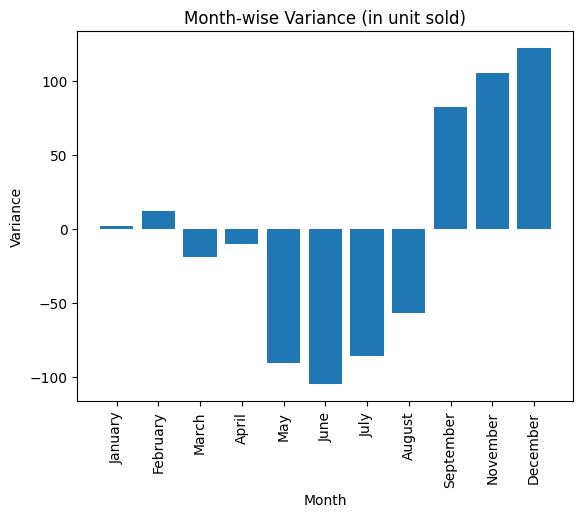

In [ ]:
plt.bar(x=monthly_variance['month'],height=monthly_variance['variance'])
plt.xlabel('Month')
plt.ylabel('Variance')
plt.title('Month-wise Variance (in unit sold)')
plt.xticks(x=monthly_variance['month'],rotation=90)
plt.show()

In [ ]:
regionwise_variance=merged_table.groupby('region')['variance'].sum().reset_index()
regionwise_variance

,region,variance
0,East,-70
1,North,71
2,South,118
3,West,-34


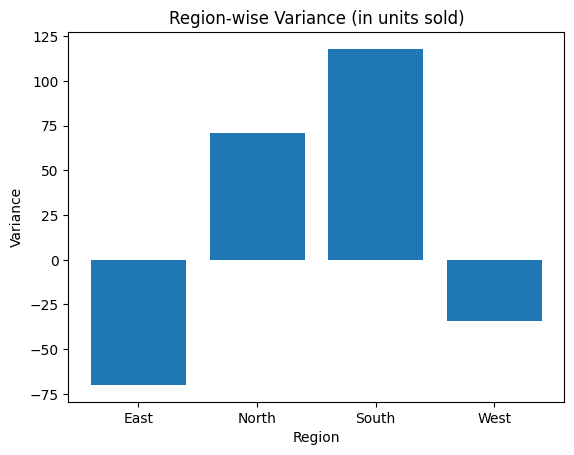

In [ ]:
plt.bar(x=regionwise_variance['region'],height=regionwise_variance['variance'])
plt.xlabel('Region')
plt.ylabel('Variance')
plt.title('Region-wise Variance (in units sold)')
plt.show()

In [ ]:
statewise_variance=merged_table.groupby('state')['variance'].sum().reset_index()
statewise_variance

,state,variance
0,Andhra Pradesh,54
1,Gujarat,-21
2,Haryana,3
3,Karnataka,55
4,Maharashtra,-29
5,Punjab,50
6,Rajasthan,-13
7,Tamil Nadu,38
8,Uttar Pradesh,18
9,West Bengal,-70


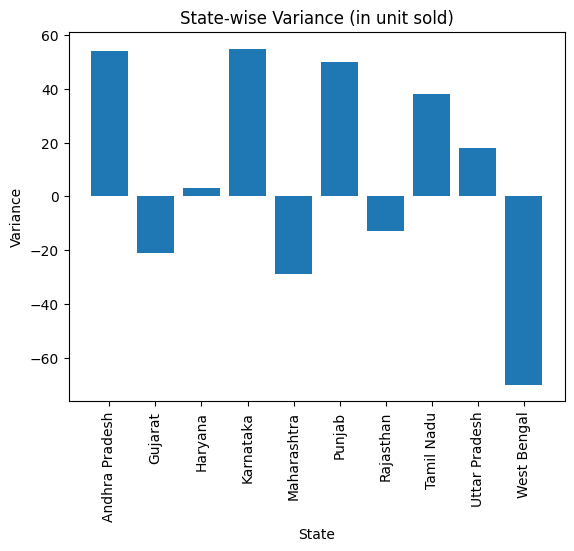

In [ ]:
plt.bar(x=statewise_variance['state'],height=statewise_variance['variance'])
plt.xlabel('State')
plt.ylabel('Variance')
plt.title('State-wise Variance (in unit sold)')
plt.xticks(x=statewise_variance['state'],rotation=90)
plt.show()